# load data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

In [4]:
file_path = 'fixednoeg.pkl'
df = pd.read_pickle(file_path)

df.head(2)

,term,formal_definition,simplified_explanation,formal_fk_grade,formal_flesch_ease,formal_smog,formal_gunning_fog,formal_dale_chall,formal_text_standard,formal_word_count,...,simplified_type_token_ratio,simplified_long_word_percentage,improvement_fk_grade,improvement_flesch_ease,improvement_smog,improvement_gunning_fog,improvement_dale_chall,improvement_word_length,improvement_syllables,improvement_long_word_percentage
0,3D-CRT,3D-CRT is A procedure that uses a computer to ...,3D-CRT stands for three-dimensional conformal ...,13.1,29.86,15.0,11.40,10.35,12th and 13th grade,52,...,0.666667,13.095238,2.3,22.03,2.4,-0.48,2.07,0.709707,0.304945,11.904762
1,FDA,FDA is An agency in the U.S. federal governmen...,FDA stands for Food and Drug Administration. I...,9.3,55.95,13.4,13.99,10.09,10th and 11th grade,69,...,0.760000,10.666667,1.7,15.19,2.2,4.25,2.13,0.467826,0.154783,8.173913


In [5]:
rawdf=df
def convert_improvements_to_percentages(df):
    """
    Convert improvement columns from subtraction differences to percentages.
    
    Formula: (simplified_value - formal_value) / formal_value * 100 for metrics where higher is better
             (formal_value - simplified_value) / formal_value * 100 for metrics where lower is better
    
    Args:
        df: Pandas DataFrame containing the medical terms data
        
    Returns:
        DataFrame with improvement columns converted to percentages
    """
    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()
    
    # Define which metrics are better when higher or lower
    # For readability metrics like Flesch ease, higher is better
    # For grade levels and complexity measures, lower is better
    higher_better = ['flesch_ease']
    lower_better = ['fk_grade', 'smog', 'gunning_fog', 'dale_chall', 
                   'word_length', 'syllables', 'long_word_percentage']
    
    # Process metrics where higher values are better
    for metric in higher_better:
        formal_col = f'formal_{metric}'
        if formal_col in df.columns:
            # Avoid division by zero
            mask = df[formal_col] != 0
            result_df.loc[mask, f'improvement_{metric}'] = (
                (df.loc[mask, f'simplified_{metric}'] - df.loc[mask, formal_col]) / 
                df.loc[mask, formal_col] * 100
            )
    
    # Process metrics where lower values are better
    for metric in lower_better:
        formal_col = f'formal_{metric}'
        if formal_col in df.columns:
            # Avoid division by zero
            mask = df[formal_col] != 0
            result_df.loc[mask, f'improvement_{metric}'] = (
                (df.loc[mask, formal_col] - df.loc[mask, f'simplified_{metric}']) / 
                df.loc[mask, formal_col] * 100
            )
    
    # Round percentage values to 2 decimal places
    for col in result_df.columns:
        if col.startswith('improvement_'):
            result_df[col] = result_df[col].round(2)
    
    return result_df

df = convert_improvements_to_percentages(rawdf)

In [6]:
def txt_to_dict(file_path):
    data_dict = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines) - 1, 2):
            key = lines[i].strip()    # Odd line are key
            value = lines[i + 1].strip()  # Even line are value
            data_dict[key] = value

    return data_dict


txt_file_path = 'formaldef.txt' 
formaldic = txt_to_dict(txt_file_path)
len(formaldic)

res={}
for k,v in formaldic.items():
    res[k.split('Listen to pronunciation')[0].split('(')[0]]=v
formaldic=res
import csv

def csv_to_dict(file_path):
    data_dict = {}
    with open(file_path, mode='r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            if len(row) >= 3: 
                key, value = row[1].strip(), row[2].strip()
                data_dict[key] = value
    return data_dict

csv_file_path = 'easydef.csv' 
easydic = csv_to_dict(csv_file_path)
csv_file_path = 'easydef2.csv' 
easydic2 = csv_to_dict(csv_file_path)

easydic=easydic|easydic2
len(easydic)

# Import pandas
import pandas as pd

# Create a DataFrame instead of a list
data_list = []
for k in easydic.keys():
    if k in formaldic:
        data_list.append([k, easydic[k]])

data = pd.DataFrame(data_list, columns=['term', 'easy_definition'])

data.head(2)

,term,easy_definition
0,biomarker testing,A lab test of any molecule in your body that c...
1,biopsy,A procedure that removes fluid or tissue sampl...


In [7]:
joined_df = pd.merge(df, data, on='term', how='inner')
joined_df.head()

,term,formal_definition,simplified_explanation,formal_fk_grade,formal_flesch_ease,formal_smog,formal_gunning_fog,formal_dale_chall,formal_text_standard,formal_word_count,...,simplified_long_word_percentage,improvement_fk_grade,improvement_flesch_ease,improvement_smog,improvement_gunning_fog,improvement_dale_chall,improvement_word_length,improvement_syllables,improvement_long_word_percentage,easy_definition
0,3D-CRT,3D-CRT is A procedure that uses a computer to ...,3D-CRT stands for three-dimensional conformal ...,13.1,29.86,15.0,11.40,10.35,12th and 13th grade,52,...,13.095238,17.56,73.78,16.00,-4.21,20.00,0.71,0.30,47.62,Three-dimensional conformal radiation therapy.
1,FDA,FDA is An agency in the U.S. federal governmen...,FDA stands for Food and Drug Administration. I...,9.3,55.95,13.4,13.99,10.09,10th and 11th grade,69,...,10.666667,18.28,27.15,16.42,30.38,21.11,0.47,0.15,43.38,Food and Drug Administration.
2,Cushing syndrome,Cushing syndrome is A condition in which there...,Cushing syndrome is when there is too much of ...,9.4,61.06,10.8,10.45,9.31,10th and 11th grade,109,...,6.818182,9.57,12.69,6.48,6.22,15.47,0.20,0.05,17.42,A condition caused by the release of excess co...
3,DNA,DNA is The molecule inside cells that contains...,DNA is like a special set of instructions insi...,9.6,60.35,11.5,11.51,9.22,9th and 10th grade,138,...,8.988764,15.62,15.36,2.61,16.94,20.50,-0.04,0.06,4.58,Deoxyribonucleic acid.
4,Breslow thickness,Breslow thickness is A measure of how deeply a...,Breslow thickness is a way doctors measure how...,7.1,67.04,8.3,7.71,8.84,7th and 8th grade,87,...,3.947368,-23.94,9.20,-6.02,-28.27,17.76,0.16,0.07,31.32,A measure of how deep the melanoma tumor has g...


In [8]:
import numpy as np
np.mean(df.improvement_fk_grade),np.mean(df.improvement_flesch_ease)

(-7.046390977443608, 15.034135338345864)

## save to csv for others

In [9]:
joined_df.to_csv('out.csv', index=False)

# vis

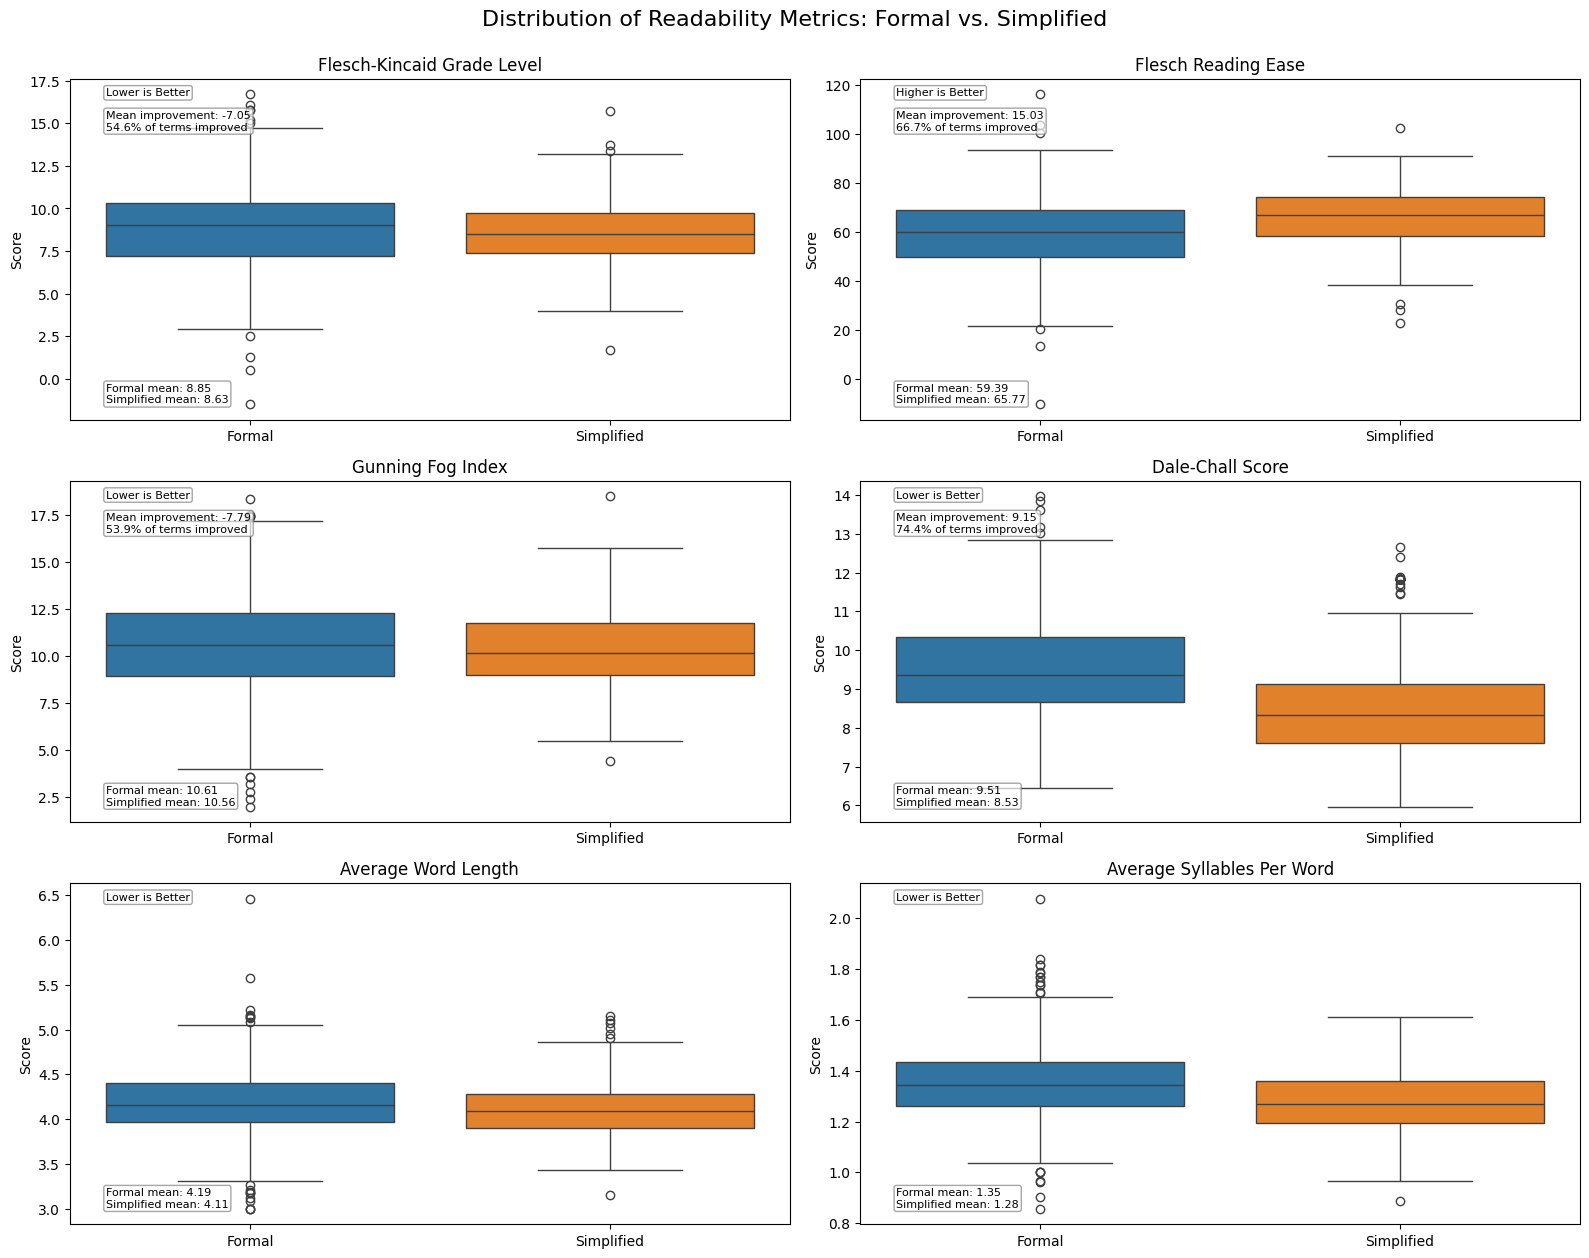

In [10]:
def plot_metric_distributions(df):
    """
    Create boxplots comparing formal vs simplified metric distributions for all metrics
    """
    metrics = [
        ('fk_grade', 'Flesch-Kincaid Grade Level', False),
        ('flesch_ease', 'Flesch Reading Ease', True),
        # ('smog', 'SMOG Index', False),
        ('gunning_fog', 'Gunning Fog Index', False),
        ('dale_chall', 'Dale-Chall Score', False),
        ('avg_word_length', 'Average Word Length', False),
        ('avg_syllables_per_word', 'Average Syllables Per Word', False)
    ]
    
    # Create boxplot comparisons
    plt.figure(figsize=(16, 16))
    for i, (metric, title, higher_is_better) in enumerate(metrics, 1):
        plt.subplot(4, 2, i)  # Using a 4x2 grid for 7 plots
        
        # Create dataframe for boxplot
        boxplot_data = pd.DataFrame({
            'Formal': df[f'formal_{metric}'],
            'Simplified': df[f'simplified_{metric}']
        })
        
        # Calculate improvement
        improvement_col = f'improvement_{metric}'
        if improvement_col in df.columns:
            mean_improvement = df[improvement_col].mean()
            pct_improved = (df[improvement_col] > 0).mean() * 100
            improvement_text = f"Mean improvement: {mean_improvement:.2f}\n{pct_improved:.1f}% of terms improved"
        else:
            improvement_text = ""
        
        # Create boxplot
        box_plot = sns.boxplot(data=boxplot_data)
        
        # Add swarm plot for visibility of individual data points (optional for large datasets)
        # Uncomment if you want to see individual points
        # sns.swarmplot(data=boxplot_data, color=".25", size=2, alpha=0.5)
        
        # Add statistical annotations
        formal_mean = df[f'formal_{metric}'].mean()
        simplified_mean = df[f'simplified_{metric}'].mean()
        
        # Add mean values as text
        plt.annotate(f"Formal mean: {formal_mean:.2f}\nSimplified mean: {simplified_mean:.2f}",
                     xy=(0.05, 0.05), xycoords='axes fraction', fontsize=8,
                     bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
        
        # Add improvement text if available
        if improvement_text:
            plt.annotate(improvement_text,
                        xy=(0.05, 0.85), xycoords='axes fraction', fontsize=8,
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
        
        # Add direction indicator
        direction = "Higher is Better" if higher_is_better else "Lower is Better"
        plt.annotate(direction, xy=(0.05, 0.95), xycoords='axes fraction', 
                     fontsize=8, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
        
        # Add title and labels
        plt.title(title)
        plt.ylabel('Score')
    
    plt.tight_layout()
    plt.suptitle('Distribution of Readability Metrics: Formal vs. Simplified', y=1.02, fontsize=16)
    plt.savefig("metric_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_metric_distributions(df)

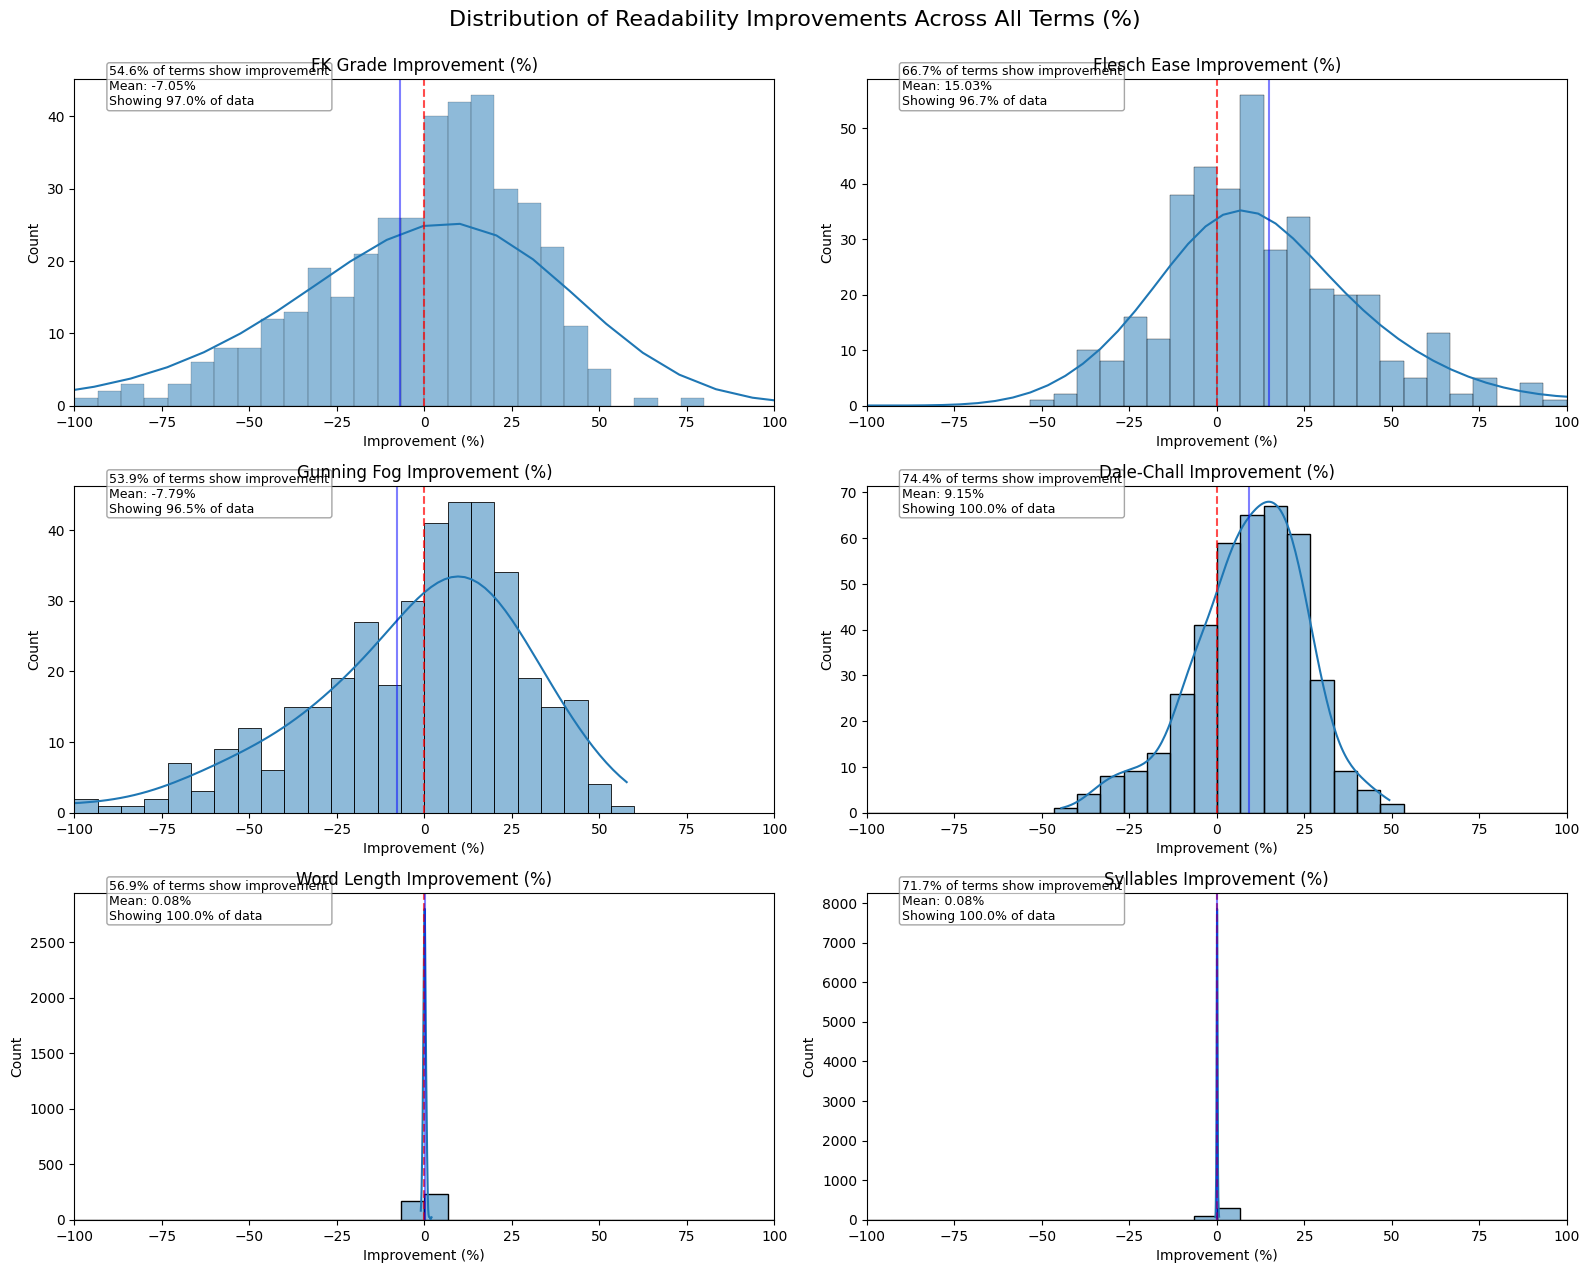

In [11]:
def plot_improvement_histograms(df):
    """
    Create histograms showing the distribution of percentage improvements for each metric
    with a focused range and 30 bins
    """
    # Define the metrics to include
    metrics = [
        ('improvement_fk_grade', 'FK Grade Improvement (%)'),
        ('improvement_flesch_ease', 'Flesch Ease Improvement (%)'),
        # ('improvement_smog', 'SMOG Index Improvement (%)'),
        ('improvement_gunning_fog', 'Gunning Fog Improvement (%)'),
        ('improvement_dale_chall', 'Dale-Chall Improvement (%)'),
        ('improvement_word_length', 'Word Length Improvement (%)'),
        ('improvement_syllables', 'Syllables Improvement (%)')
    ]
    
    # Create a larger figure to accommodate 7 subplots
    plt.figure(figsize=(16, 16))
    
    # Define the x-axis limits for the focused view
    x_min, x_max = -100, 100  # Adjust this range as needed to capture the most relevant data
    
    for i, (metric, title) in enumerate(metrics, 1):
        plt.subplot(4, 2, i)  # Using a 4x2 grid for 7 plots
        
        # Calculate percentage of terms with positive improvement
        positive_pct = (df[metric] > 0).mean() * 100
        
        # Calculate percentage of data visible in the plot
        visible_data_pct = ((df[metric] >= x_min) & (df[metric] <= x_max)).mean() * 100
        
        # Create histogram with exactly 30 bins in the visible range
        sns.histplot(df[metric], kde=True, bins=30, binrange=(x_min, x_max))
        
        # Add a vertical line at x=0 to show positive/negative boundary
        plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
        
        # Compute mean improvement percentage
        mean_improvement = df[metric].mean()
        
        # Add a vertical line at the mean (if within the visible range)
        if x_min <= mean_improvement <= x_max:
            plt.axvline(x=mean_improvement, color='blue', linestyle='-', alpha=0.5)
        
        # Annotate with percentage of terms showing improvement and mean
        plt.annotate(f"{positive_pct:.1f}% of terms show improvement\n"
                     f"Mean: {mean_improvement:.2f}%\n"
                     f"Showing {visible_data_pct:.1f}% of data",
                     xy=(0.05, 0.92), xycoords='axes fraction', fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
        
        plt.title(title)
        plt.xlim(x_min, x_max)  # Set x-axis limits to the focused range
        plt.xlabel('Improvement (%)')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.suptitle('Distribution of Readability Improvements Across All Terms (%)', y=1.02, fontsize=16)
    plt.savefig("improvement_histograms_percentage_focused.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_improvement_histograms(df)


# stats

In [12]:

def create_summary_statistics(df):
   """
   Create a table with summary statistics
   """
   # Calculate improvement metrics if not already present
   if 'improvement_fk_grade' not in df.columns:
       df['improvement_fk_grade'] = df['formal_fk_grade'] - df['simplified_fk_grade']
       df['improvement_flesch_ease'] = df['simplified_flesch_ease'] - df['formal_flesch_ease']
       df['improvement_smog'] = df['formal_smog'] - df['simplified_smog']
       df['improvement_gunning_fog'] = df['formal_gunning_fog'] - df['simplified_gunning_fog']
       df['improvement_dale_chall'] = df['formal_dale_chall'] - df['simplified_dale_chall']

   # Create summary table
   metrics = ['fk_grade', 'flesch_ease',  'gunning_fog', 'dale_chall']
   summary_rows = []
   
   for metric in metrics:
       formal_col = f'formal_{metric}'
       simplified_col = f'simplified_{metric}'
       improvement_col = f'improvement_{metric}'
       
       formal_mean = df[formal_col].mean()
       formal_std = df[formal_col].std()
       simplified_mean = df[simplified_col].mean()
       simplified_std = df[simplified_col].std()
       
       improvement_mean = df[improvement_col].mean()
       improvement_std = df[improvement_col].std()
       pct_improved = (df[improvement_col] > 0).mean() * 100
       
       summary_rows.append({
           'Metric': metric.replace('_', ' ').title(),
           'Formal Mean': formal_mean,
           'Formal SD': formal_std,
           'Simplified Mean': simplified_mean,
           'Simplified SD': simplified_std,
           'Mean Improvement': improvement_mean,
           'Improvement SD': improvement_std,
           '% Terms Improved': pct_improved
       })
   
   # Add word count
   formal_wc_mean = df['formal_word_count'].mean()
   formal_wc_std = df['formal_word_count'].std()
   simplified_wc_mean = df['simplified_word_count'].mean()
   simplified_wc_std = df['simplified_word_count'].std()

   summary_rows.append({
       'Metric': 'Word Count',
       'Formal Mean': formal_wc_mean,
       'Formal SD': formal_wc_std,
       'Simplified Mean': simplified_wc_mean,
       'Simplified SD': simplified_wc_std,
   })
   
   summary_df = pd.DataFrame(summary_rows)
   
   # Print the table
   pd.set_option('display.float_format', '{:.2f}'.format)
   print("\nSummary Statistics:")
   print(summary_df)
   
   # Save to CSV
   summary_df.to_csv("readability_summary_statistics.csv", index=False)
   
   return summary_df
create_summary_statistics(df)




Summary Statistics:
        Metric  Formal Mean  Formal SD  Simplified Mean  Simplified SD  \
0     Fk Grade         8.85       2.58             8.63           1.89   
1  Flesch Ease        59.39      14.78            65.77          11.66   
2  Gunning Fog        10.61       2.73            10.56           2.39   
3   Dale Chall         9.51       1.29             8.53           1.37   
4   Word Count        61.36      36.96            67.72          22.47   

   Mean Improvement  Improvement SD  % Terms Improved  
0             -7.05           90.83             54.64  
1             15.03           50.26             66.67  
2             -7.79           46.11             53.88  
3              9.15           16.08             74.44  
4               NaN             NaN               NaN  


,Metric,Formal Mean,Formal SD,Simplified Mean,Simplified SD,Mean Improvement,Improvement SD,% Terms Improved
0,Fk Grade,8.85,2.58,8.63,1.89,-7.05,90.83,54.64
1,Flesch Ease,59.39,14.78,65.77,11.66,15.03,50.26,66.67
2,Gunning Fog,10.61,2.73,10.56,2.39,-7.79,46.11,53.88
3,Dale Chall,9.51,1.29,8.53,1.37,9.15,16.08,74.44
4,Word Count,61.36,36.96,67.72,22.47,NaN,NaN,NaN


In [13]:
import pandas as pd
import scipy.stats as stats

def perform_wilcoxon_tests(df):
    """
    Perform Wilcoxon signed-rank tests on improvement metrics to test if the
    improvements are statistically significant (different from zero).
    
    Args:
        df: Pandas DataFrame containing the improvement metrics
        
    Returns:
        DataFrame with the test results including statistics and p-values
    """
    # Define the improvement metrics to test
    improvement_metrics = [
        'improvement_fk_grade',
        'improvement_flesch_ease',
        # 'improvement_smog',
        'improvement_gunning_fog', 
        'improvement_dale_chall',
        'improvement_word_length',
        'improvement_syllables',
        'improvement_long_word_percentage'
    ]
    
    # Filter to only include metrics that exist in the dataframe
    metrics_to_test = [metric for metric in improvement_metrics if metric in df.columns]
    
    # Initialize lists to store results
    metric_names = []
    statistics = []
    p_values = []
    is_significant = []
    
    # Perform Wilcoxon test for each metric
    for metric in metrics_to_test:
        # Remove NaN values
        values = df[metric].dropna()
        
        # Only perform test if we have data
        if len(values) > 0:
            # Wilcoxon signed-rank test (testing if values are different from 0)
            stat, p_value = stats.wilcoxon(values, alternative='greater')
            
            # Store results
            metric_names.append(metric.replace('improvement_', ''))
            statistics.append(stat)
            p_values.append(p_value)
            is_significant.append('Yes' if p_value < 0.05 else 'No')
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Metric': metric_names,
        'Statistic': statistics,
        'P-value': p_values,
        'Significant (p<0.05)': is_significant
    })
    
    # Sort by p-value
    results_df = results_df.sort_values(by='P-value')
    
    # Format p-values for display
    results_df['P-value'] = results_df['P-value'].apply(lambda p: f"{p:.6f}" if p >= 0.0001 else "<0.0001")
    
    return results_df

# Example usage:
wilcoxon_results = perform_wilcoxon_tests(df)
print(wilcoxon_results)

                 Metric  Statistic   P-value Significant (p<0.05)
3            dale_chall   63612.00   <0.0001                  Yes
5             syllables   59127.00   <0.0001                  Yes
6  long_word_percentage   59809.00   <0.0001                  Yes
1           flesch_ease   59670.50   <0.0001                  Yes
4           word_length   47677.00   <0.0001                  Yes
0              fk_grade   38682.50  0.504957                   No
2           gunning_fog   37582.00  0.774907                   No


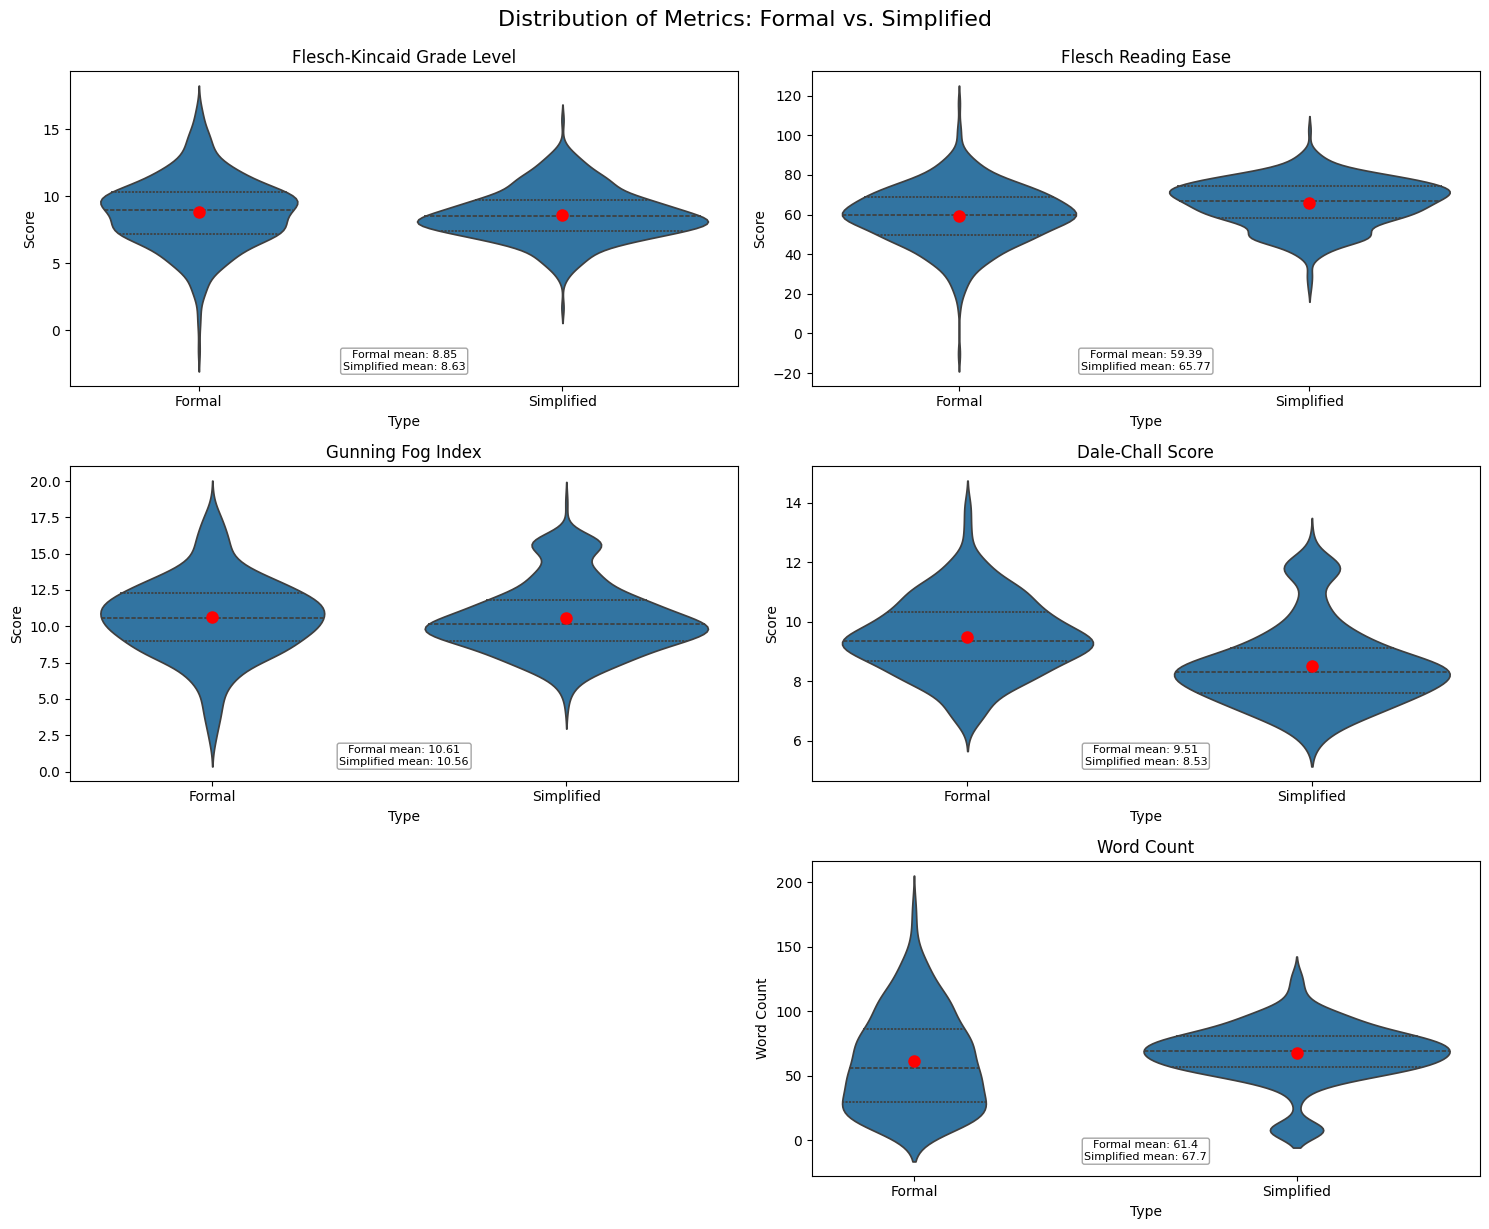

In [14]:

# 7. Violin plots showing distribution
def plot_violin_distributions(df):
   """
   Create violin plots showing the distribution of formal vs simplified metrics
   """
   metrics = [
       ('fk_grade', 'Flesch-Kincaid Grade Level'),
       ('flesch_ease', 'Flesch Reading Ease'),
    #    ('smog', 'SMOG Index'),
       ('gunning_fog', 'Gunning Fog Index'),
       ('dale_chall', 'Dale-Chall Score')
   ]
   
   plt.figure(figsize=(15, 12))
   
   for i, (metric, title) in enumerate(metrics, 1):
       plt.subplot(3, 2, i)
       
       # Prepare data in long format for seaborn
       formal_data = df[f'formal_{metric}']
       simplified_data = df[f'simplified_{metric}']
       
       # Combine data into a DataFrame
       plot_data = pd.DataFrame({
           'Score': pd.concat([formal_data, simplified_data]),
           'Type': ['Formal']*len(formal_data) + ['Simplified']*len(simplified_data)
       })
       
       # Create violin plot
       sns.violinplot(x='Type', y='Score', data=plot_data, inner='quartile')
       
       # Add mean markers
       plt.plot(['Formal', 'Simplified'], [formal_data.mean(), simplified_data.mean()], 'ro', ms=8)
       
       # Add annotations
       plt.title(title)
       plt.ylabel('Score')
       
       # Add mean values as text
       plt.annotate(f"Formal mean: {formal_data.mean():.2f}\nSimplified mean: {simplified_data.mean():.2f}",
                   xy=(0.5, 0.05), xycoords='axes fraction', fontsize=8, ha='center',
                   bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
   
   # Add word count violin plot
   plt.subplot(3, 2, 6)
   
   # Prepare word count data
   formal_wc = df['formal_word_count']
   simplified_wc = df['simplified_word_count']
   
   # Combine data into a DataFrame
   wc_plot_data = pd.DataFrame({
       'Word Count': pd.concat([formal_wc, simplified_wc]),
       'Type': ['Formal']*len(formal_wc) + ['Simplified']*len(simplified_wc)
   })
   
   # Create violin plot
   sns.violinplot(x='Type', y='Word Count', data=wc_plot_data, inner='quartile')
   
   # Add mean markers
   plt.plot(['Formal', 'Simplified'], [formal_wc.mean(), simplified_wc.mean()], 'ro', ms=8)
   
   # Add annotations
   plt.title('Word Count')
   
   # Add mean values as text
   plt.annotate(f"Formal mean: {formal_wc.mean():.1f}\nSimplified mean: {simplified_wc.mean():.1f}",
               xy=(0.5, 0.05), xycoords='axes fraction', fontsize=8, ha='center',
               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
   
   plt.tight_layout()
   plt.suptitle('Distribution of Metrics: Formal vs. Simplified', y=1.02, fontsize=16)
   plt.savefig("violin_distributions.png", dpi=300)
   plt.show()
plot_violin_distributions(df)

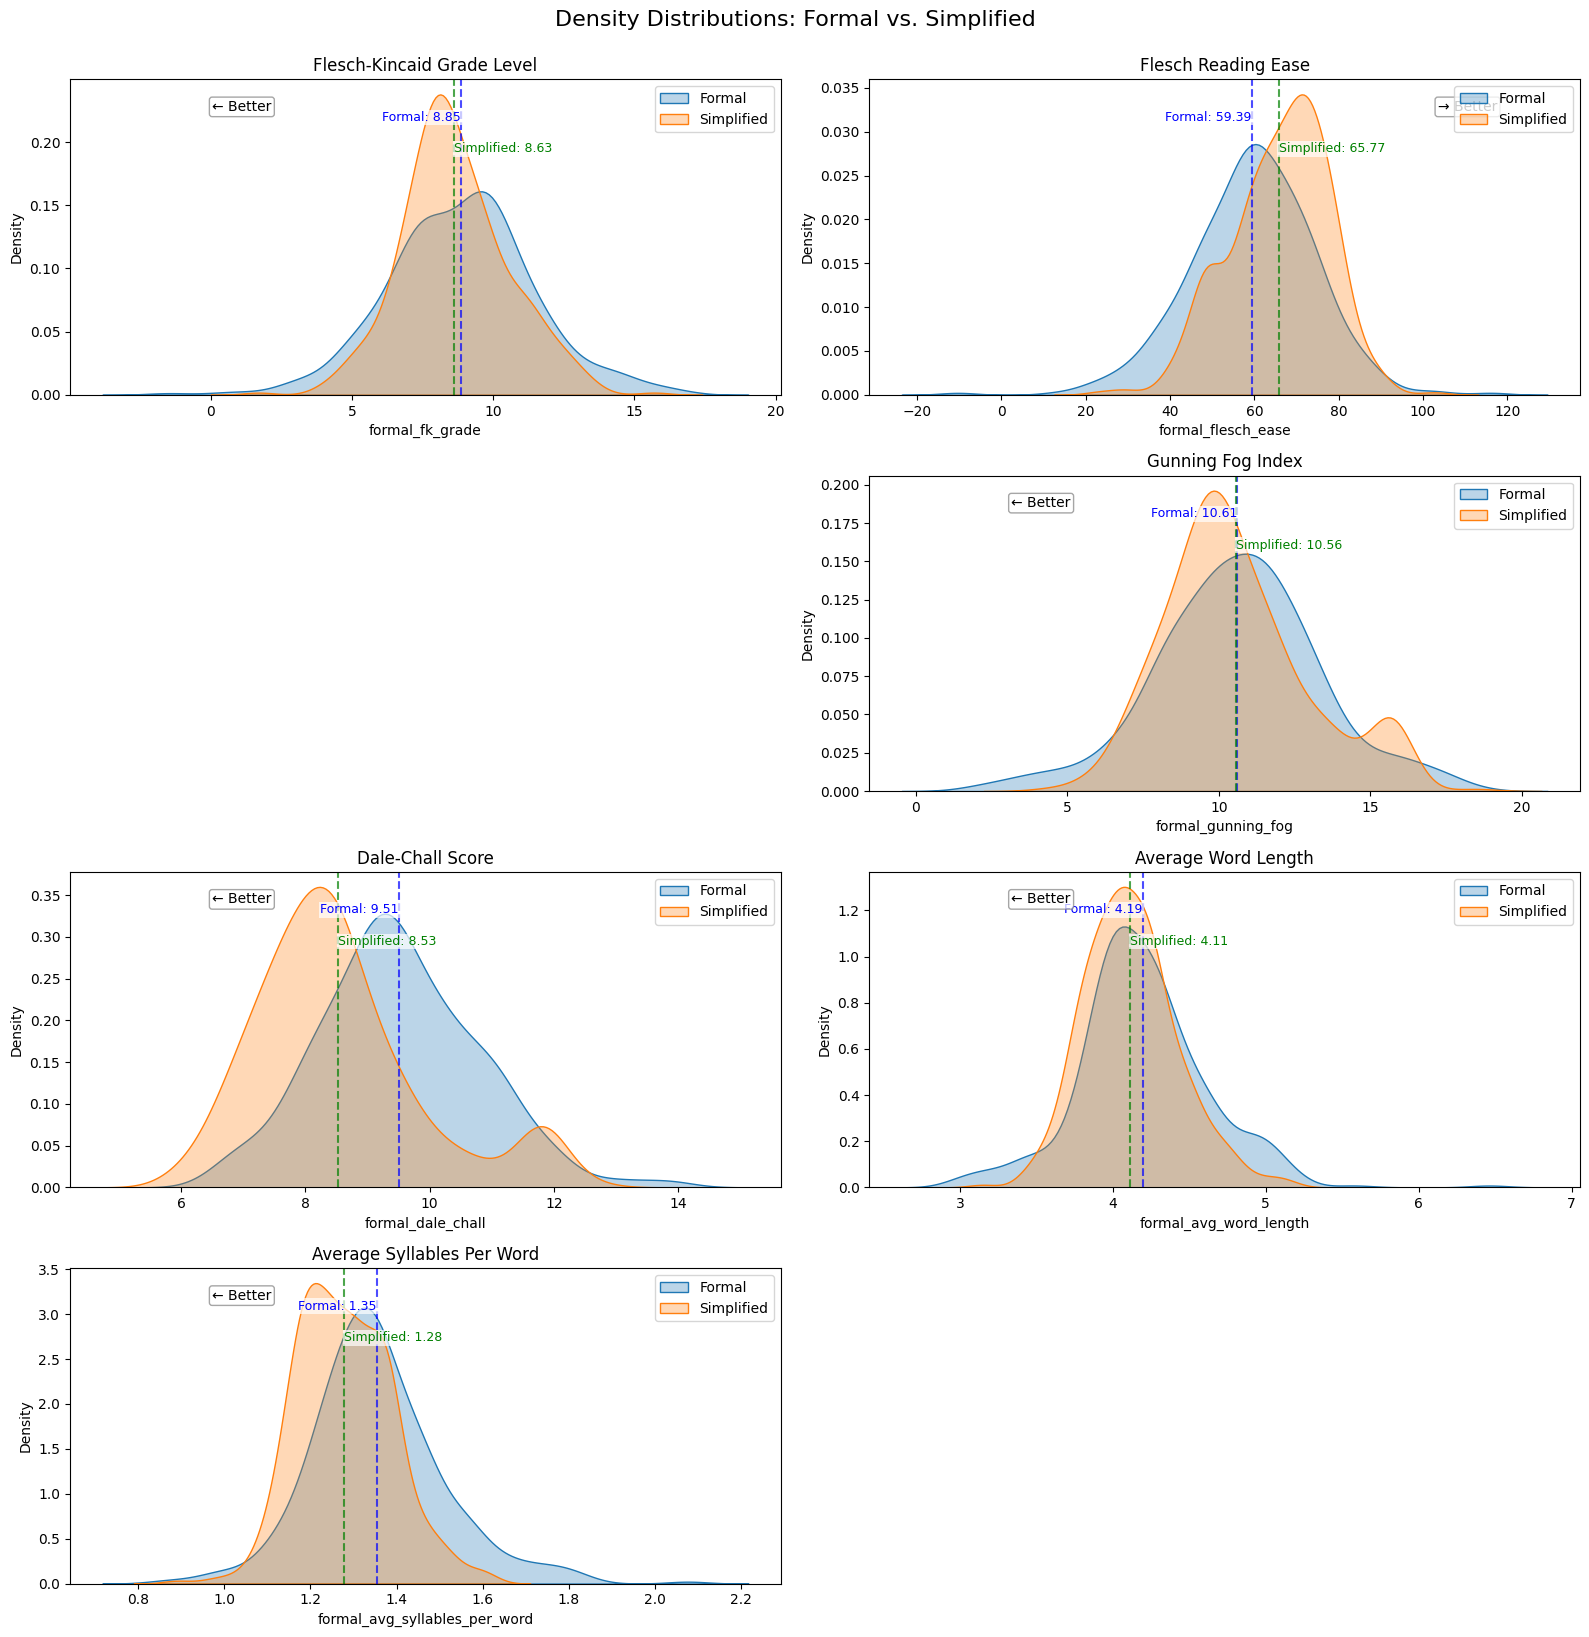

In [15]:
def plot_density_comparisons(df):
    """
    Create density plots comparing formal vs simplified metrics
    """
    # Create a figure with a 4x2 grid for 7 plots (8 slots total, one will be empty)
    plt.figure(figsize=(16, 16))
    
    # Define the metrics to plot
    plots = [
        # metric name, title, higher_is_better, position in subplot grid
        ('fk_grade', 'Flesch-Kincaid Grade Level', False, 1),
        ('flesch_ease', 'Flesch Reading Ease', True, 2),
        # ('smog', 'SMOG Index', False, 3),
        ('gunning_fog', 'Gunning Fog Index', False, 4),
        ('dale_chall', 'Dale-Chall Score', False, 5),
        ('avg_word_length', 'Average Word Length', False, 6),
        ('avg_syllables_per_word', 'Average Syllables Per Word', False, 7)
    ]
    
    # Create each plot
    for metric, title, higher_is_better, position in plots:
        plt.subplot(4, 2, position)
        
        # Create KDE plots
        sns.kdeplot(df[f'formal_{metric}'], label='Formal', fill=True, alpha=0.3)
        sns.kdeplot(df[f'simplified_{metric}'], label='Simplified', fill=True, alpha=0.3)
        
        # Add vertical lines for means
        formal_mean = df[f'formal_{metric}'].mean()
        simplified_mean = df[f'simplified_{metric}'].mean()
        
        plt.axvline(formal_mean, color='blue', linestyle='--', alpha=0.7)
        plt.axvline(simplified_mean, color='green', linestyle='--', alpha=0.7)
        
        # Add text for mean values
        ymin, ymax = plt.ylim()
        plt.text(formal_mean, ymax*0.9, f"Formal: {formal_mean:.2f}", 
                color='blue', ha='right', va='top', fontsize=9, 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
        
        plt.text(simplified_mean, ymax*0.8, f"Simplified: {simplified_mean:.2f}", 
                color='green', ha='left', va='top', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
        
        # Add indicator of better direction
        direction = "→ Better" if higher_is_better else "← Better"
        position_x = 0.8 if higher_is_better else 0.2
        plt.annotate(direction, xy=(position_x, 0.9), xycoords='axes fraction', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7))
        
        plt.title(title)
        plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.suptitle('Density Distributions: Formal vs. Simplified', y=1.02, fontsize=16)
    plt.savefig("density_comparisons.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_density_comparisons(df)


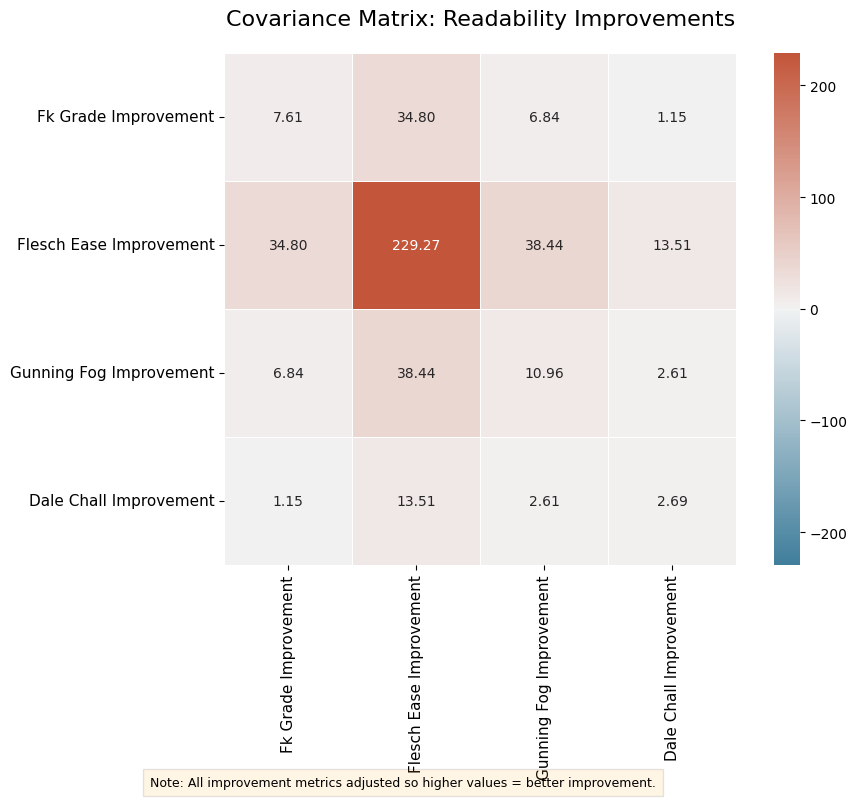

,Fk Grade Improvement,Flesch Ease Improvement,Gunning Fog Improvement,Dale Chall Improvement
Fk Grade Improvement,7.61,34.80,6.84,1.15
Flesch Ease Improvement,34.80,229.27,38.44,13.51
Gunning Fog Improvement,6.84,38.44,10.96,2.61
Dale Chall Improvement,1.15,13.51,2.61,2.69


In [16]:
def plot_improvement_covariance(df):
    """
    Create a covariance matrix heatmap specifically for readability improvement metrics,
    accounting for different directions of improvement
    """
    # Define improvement metrics and which direction is better
    metrics = [
        ('fk_grade', False),       # Lower is better
        ('flesch_ease', True),     # Higher is better
        # ('smog', False),           # Lower is better
        ('gunning_fog', False),    # Lower is better
        ('dale_chall', False)      # Lower is better
    ]
    
    # Adjust metrics to align "better" direction (higher values = better)
    adjusted_df = df.copy()
    
    # Calculate and adjust improvement metrics
    for metric, higher_is_better in metrics:
        if not higher_is_better:
            # For metrics where lower is better, improvement = formal - simplified
            adjusted_df[f'adj_improvement_{metric}'] = df[f'formal_{metric}'] - df[f'simplified_{metric}']
        else:
            # For metrics where higher is better, improvement = simplified - formal
            adjusted_df[f'adj_improvement_{metric}'] = df[f'simplified_{metric}'] - df[f'formal_{metric}']
    
    # Define columns for covariance matrix
    improvement_cols = [f'adj_improvement_{metric[0]}' for metric in metrics]
    
    # Create readable labels
    col_names = {
        f'adj_improvement_{metric[0]}': f'{metric[0].replace("_", " ").title()} Improvement' for metric in metrics
    }
    
    # Compute covariance matrix
    cov_df = adjusted_df[improvement_cols].cov()
    
    # Rename columns and index
    cov_df = cov_df.rename(columns=col_names, index=col_names)
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    
    # Use a diverging colormap to emphasize positive/negative covariances
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Get the absolute max for symmetric vmin and vmax
    abs_max = max(abs(cov_df.min().min()), abs(cov_df.max().max()))
    
    # Plot the heatmap
    sns.heatmap(cov_df, cmap=cmap, annot=True, fmt='.2f', square=True, 
                linewidths=.5, center=0, vmin=-abs_max, vmax=abs_max)
    
    # Adjust label font size
    plt.tick_params(axis='both', which='major', labelsize=11)
    
    # Add title
    plt.title('Covariance Matrix: Readability Improvements', fontsize=16, pad=20)
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: All improvement metrics adjusted so higher values = better improvement.", 
               ha="center", fontsize=9, bbox={"facecolor":"orange", "alpha":0.1, "pad":5})
    
    plt.tight_layout()
    plt.savefig("improvement_covariance_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Return the covariance dataframe for further analysis
    return cov_df
plot_improvement_covariance(df)

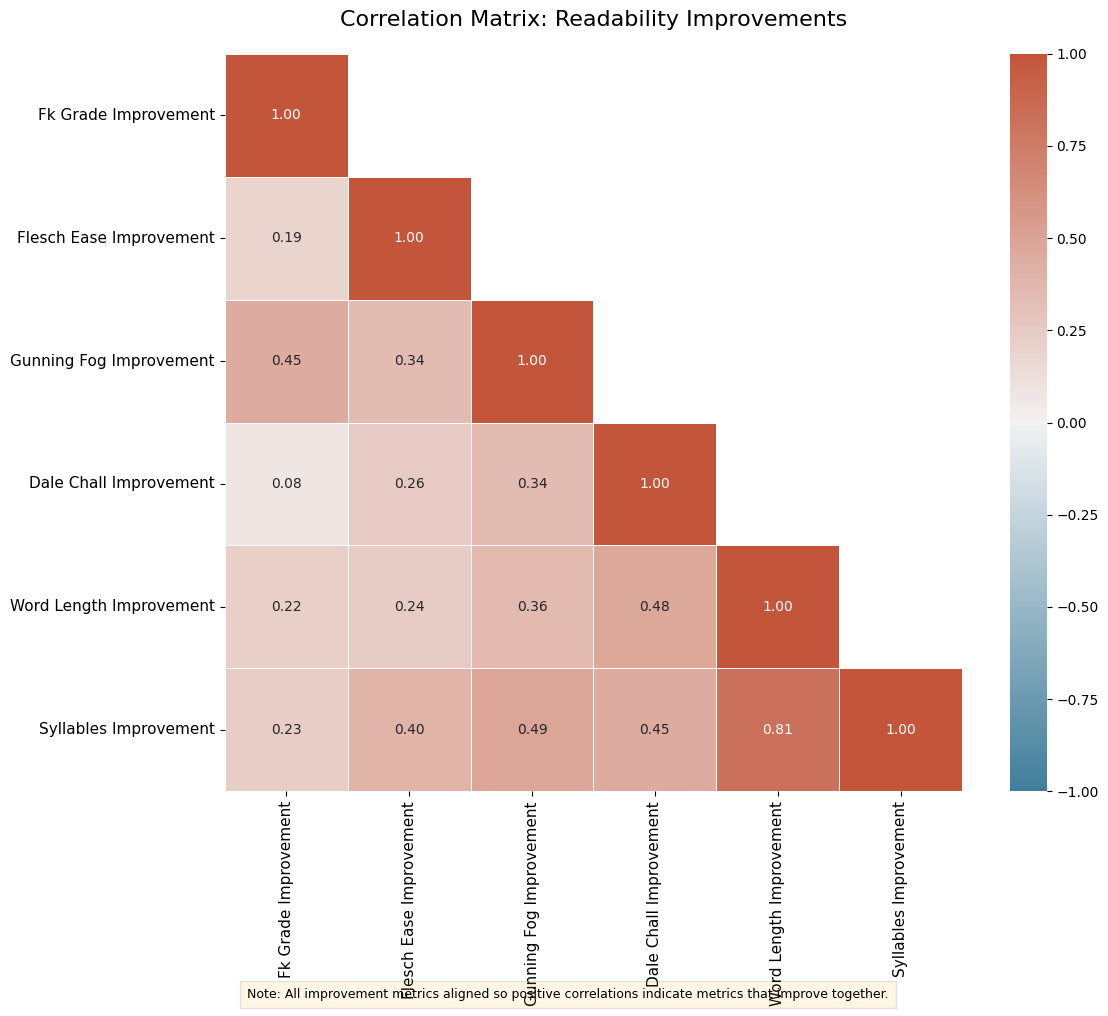

,Fk Grade Improvement,Flesch Ease Improvement,Gunning Fog Improvement,Dale Chall Improvement,Word Length Improvement,Syllables Improvement
Fk Grade Improvement,1.00,0.19,0.45,0.08,0.22,0.23
Flesch Ease Improvement,0.19,1.00,0.34,0.26,0.24,0.40
Gunning Fog Improvement,0.45,0.34,1.00,0.34,0.36,0.49
Dale Chall Improvement,0.08,0.26,0.34,1.00,0.48,0.45
Word Length Improvement,0.22,0.24,0.36,0.48,1.00,0.81
Syllables Improvement,0.23,0.40,0.49,0.45,0.81,1.00


In [17]:
def plot_improvement_correlation(df):
    """
    Create a correlation matrix heatmap specifically for readability improvement metrics,
    showing only the lower triangle of the matrix
    """
    # Define improvement metrics and which direction is better
    metrics = [
        ('fk_grade', False),       # Lower is better
        ('flesch_ease', True),     # Higher is better
        # ('smog', False),           # Lower is better
        ('gunning_fog', False),    # Lower is better
        ('dale_chall', False),     # Lower is better
        ('word_length', False),    # Lower is better
        ('syllables', False)       # Lower is better
    ]
    
    # Check which improvement columns actually exist in the dataframe
    existing_cols = []
    for metric, _ in metrics:
        col_name = f'improvement_{metric}'
        if col_name in df.columns:
            existing_cols.append((metric, col_name))
        else:
            print(f"Warning: Column '{col_name}' not found in dataframe")
    
    if not existing_cols:
        raise ValueError("No improvement metrics found in dataframe")
    
    # Define columns for correlation matrix
    improvement_cols = [col for _, col in existing_cols]
    
    # Create readable labels
    col_names = {
        col: f'{metric.replace("_", " ").title()} Improvement' 
        for metric, col in existing_cols
    }
    
    # Adjust signs for metrics where higher is better to ensure consistency
    adjusted_df = df.copy()
    
    for metric, col_name in existing_cols:
        # Find the corresponding metric in our list to get the direction
        for m, higher_is_better in metrics:
            if m == metric:
                if higher_is_better:
                    # For metrics where higher is better (like flesch_ease), we expect 
                    # improvement to be positive when simplified is higher than formal
                    formal_col = f'formal_{metric}'
                    simplified_col = f'simplified_{metric}'
                    
                    if formal_col in df.columns and simplified_col in df.columns:
                        # Check if improvement aligns with simplified - formal
                        expected_impr = df[simplified_col] - df[formal_col]
                        actual_impr = df[col_name]
                        
                        # If the signs are opposite for most values, flip the sign
                        sign_match = (expected_impr * actual_impr > 0).mean()
                        if sign_match < 0.5:  # If signs match less than half the time
                            adjusted_df[col_name] = -df[col_name]
                            print(f"Adjusted sign for {col_name}")
                break
    
    # Compute correlation matrix
    corr_df = adjusted_df[improvement_cols].corr()
    
    # Rename columns and index
    corr_df = corr_df.rename(columns=col_names, index=col_names)
    
    # Create the heatmap
    plt.figure(figsize=(12, 10))
    
    # Create a mask for the upper triangle
    mask = np.zeros_like(corr_df, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True  # k=1 excludes the diagonal
    
    # Use a diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Plot the heatmap with the mask
    sns.heatmap(corr_df, mask=mask, cmap=cmap, annot=True, fmt='.2f', square=True, 
                linewidths=.5, center=0, vmin=-1, vmax=1)
    
    # Adjust label font size
    plt.tick_params(axis='both', which='major', labelsize=11)
    
    # Add title
    plt.title('Correlation Matrix: Readability Improvements', fontsize=16, pad=20)
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: All improvement metrics aligned so positive correlations indicate metrics that improve together.", 
               ha="center", fontsize=9, bbox={"facecolor":"orange", "alpha":0.1, "pad":5})
    
    plt.tight_layout()
    plt.savefig("improvement_correlation_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Return the correlation dataframe for further analysis
    return corr_df
plot_improvement_correlation(df)

# best metrics

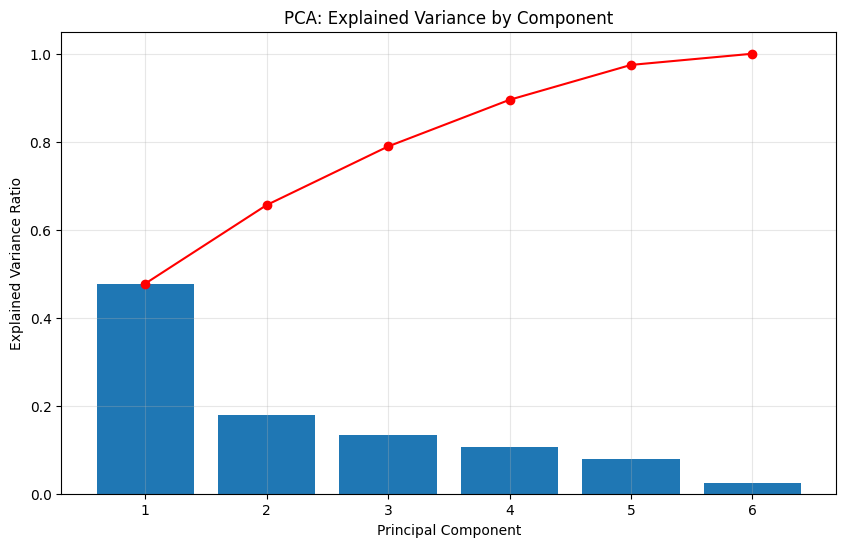

(PCA(),
                          PC1   PC2   PC3   PC4   PC5   PC6
 improvement_fk_grade    0.27  0.73 -0.30 -0.01 -0.53  0.09
 improvement_flesch_ease 0.33  0.13  0.89 -0.20 -0.18 -0.13
 improvement_gunning_fog 0.42  0.39 -0.03  0.32  0.73 -0.17
 improvement_dale_chall  0.38 -0.38  0.03  0.77 -0.33  0.08
 improvement_word_length 0.48 -0.32 -0.33 -0.36 -0.12 -0.65
 improvement_syllables   0.52 -0.22 -0.11 -0.37  0.15  0.72)

In [18]:
def analyze_improvement_dimensions(df):
    """
    Use PCA to find the most important dimensions of improvement
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import numpy as np
    
    # Define improvement metrics
    improvement_cols = [
        'improvement_fk_grade', 'improvement_flesch_ease', 
        # 'improvement_smog', 
        'improvement_gunning_fog', 
        'improvement_dale_chall', 'improvement_word_length', 
        'improvement_syllables'
    ]
    
    # Extract improvement data and remove any rows with missing values
    improvement_data = df[improvement_cols].dropna()
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(improvement_data)
    
    # Apply PCA
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             np.cumsum(pca.explained_variance_ratio_), 'r-o')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA: Explained Variance by Component')
    plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
    plt.grid(True, alpha=0.3)
    plt.savefig("pca_explained_variance.png", dpi=300)
    plt.show()
    
    # Show component loadings
    loadings = pd.DataFrame(
        pca.components_.T, 
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=improvement_cols
    )
    
    # # Plot heatmap of component loadings
    # plt.figure(figsize=(12, 8))
    # sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    # plt.title('PCA Component Loadings')
    # plt.tight_layout()
    # plt.savefig("pca_component_loadings.png", dpi=300)
    # plt.show()
    
    # # Print the top contributing features for each component
    # print("\nTop contributors to each principal component:")
    # for i in range(min(3, pca.n_components_)):  # Show first 3 components
    #     sorted_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
    #     print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.2%} of variance):")
    #     for feature, loading in sorted_loadings.items():
    #         print(f"  {feature}: {loadings.loc[feature, f'PC{i+1}']:.3f}")
    
    return pca, loadings
analyze_improvement_dimensions(df)

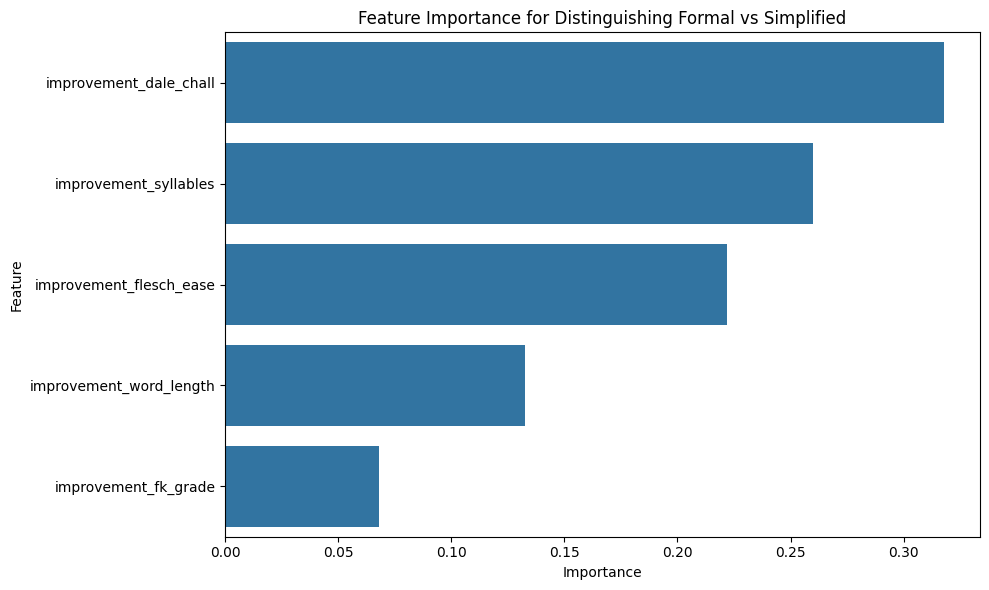

,Feature,Importance
2,improvement_dale_chall,0.32
4,improvement_syllables,0.26
1,improvement_flesch_ease,0.22
3,improvement_word_length,0.13
0,improvement_fk_grade,0.07


In [19]:
def analyze_feature_importance(df):
    """
    Train classification models to predict formal vs simplified and extract feature importance
    """
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    
    # Define improvement metrics
    improvement_cols = [
        'improvement_fk_grade', 'improvement_flesch_ease', 
        # 'improvement_smog', 'improvement_gunning_fog', 
        'improvement_dale_chall', 'improvement_word_length', 
        'improvement_syllables'
    ]
    
    # Create a dataset with two classes
    # Create formal rows (class 0)
    formal_cols_mapping = {
        'improvement_fk_grade': 'formal_fk_grade',
        'improvement_flesch_ease': 'formal_flesch_ease',
        # 'improvement_smog': 'formal_smog',
        'improvement_gunning_fog': 'formal_gunning_fog',
        'improvement_dale_chall': 'formal_dale_chall',
        'improvement_word_length': 'formal_avg_word_length',
        'improvement_syllables': 'formal_avg_syllables_per_word'
    }
    
    # For formal class, use zeros for improvements (baseline)
    formal_data = pd.DataFrame(0, index=range(len(df)), columns=improvement_cols)
    formal_data['class'] = 0  # Formal class
    
    # For simplified class, use actual improvements
    simplified_data = df[improvement_cols].copy()
    simplified_data['class'] = 1  # Simplified class
    
    # Combine datasets
    combined_data = pd.concat([formal_data, simplified_data], ignore_index=True)
    
    # Extract features and target
    X = combined_data[improvement_cols]
    y = combined_data['class']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Get feature importances
    importances = pd.DataFrame({
        'Feature': improvement_cols,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances)
    plt.title('Feature Importance for Distinguishing Formal vs Simplified')
    plt.tight_layout()
    plt.savefig("feature_importance.png", dpi=300)
    plt.show()
    
    return importances
analyze_feature_importance(df)

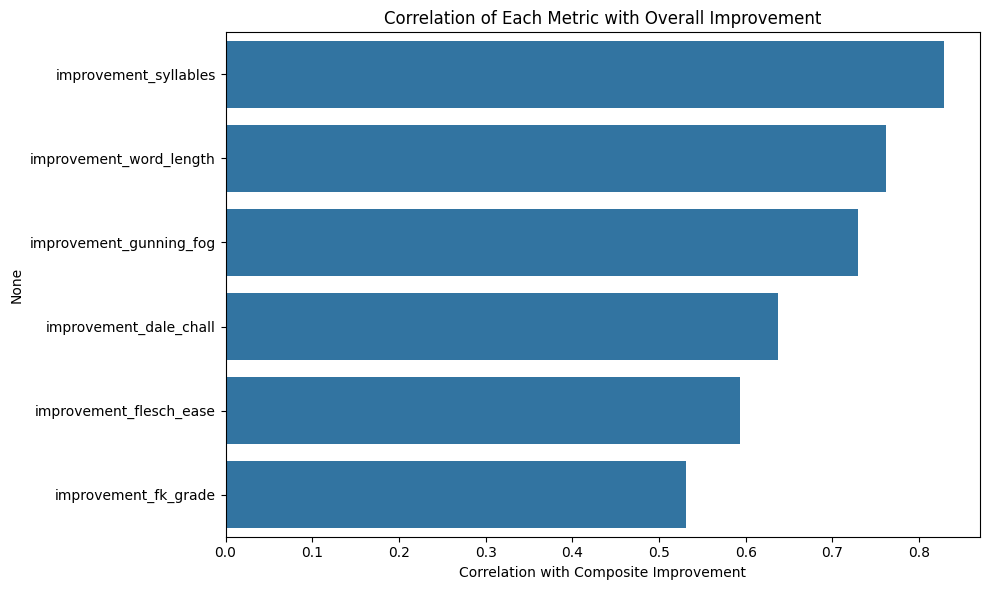

Correlations with composite improvement:
improvement_syllables: 0.829
improvement_word_length: 0.762
improvement_gunning_fog: 0.730
improvement_dale_chall: 0.638
improvement_flesch_ease: 0.593
improvement_fk_grade: 0.531


improvement_syllables     0.83
improvement_word_length   0.76
improvement_gunning_fog   0.73
improvement_dale_chall    0.64
improvement_flesch_ease   0.59
improvement_fk_grade      0.53
dtype: float64

In [20]:
def analyze_improvement_correlations(df):
    """
    Analyze which improvement metrics most strongly correlate with overall improvement
    """
    # Define improvement metrics
    improvement_cols = [
        'improvement_fk_grade', 'improvement_flesch_ease', 
        # 'improvement_smog', 
        'improvement_gunning_fog', 
        'improvement_dale_chall', 'improvement_word_length', 
        'improvement_syllables'
    ]
    
    # Create a composite improvement score (sum of z-scores)
    # First standardize all improvements to have mean 0 and std 1
    improvement_data = df[improvement_cols].copy()
    
    # Flip sign for metrics where negative is better (if any)
    # In this case, all metrics are aligned so that positive = better
    
    # Calculate z-scores
    z_scores = (improvement_data - improvement_data.mean()) / improvement_data.std()
    
    # Create composite score
    df['composite_improvement'] = z_scores.sum(axis=1)
    
    # Calculate correlations with composite improvement
    correlations = df[improvement_cols].corrwith(df['composite_improvement']).sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.values, y=correlations.index)
    plt.title('Correlation of Each Metric with Overall Improvement')
    plt.xlabel('Correlation with Composite Improvement')
    plt.tight_layout()
    plt.savefig("improvement_correlations.png", dpi=300)
    plt.show()
    
    print("Correlations with composite improvement:")
    for metric, corr in correlations.items():
        print(f"{metric}: {corr:.3f}")
    
    return correlations
analyze_improvement_correlations(df)

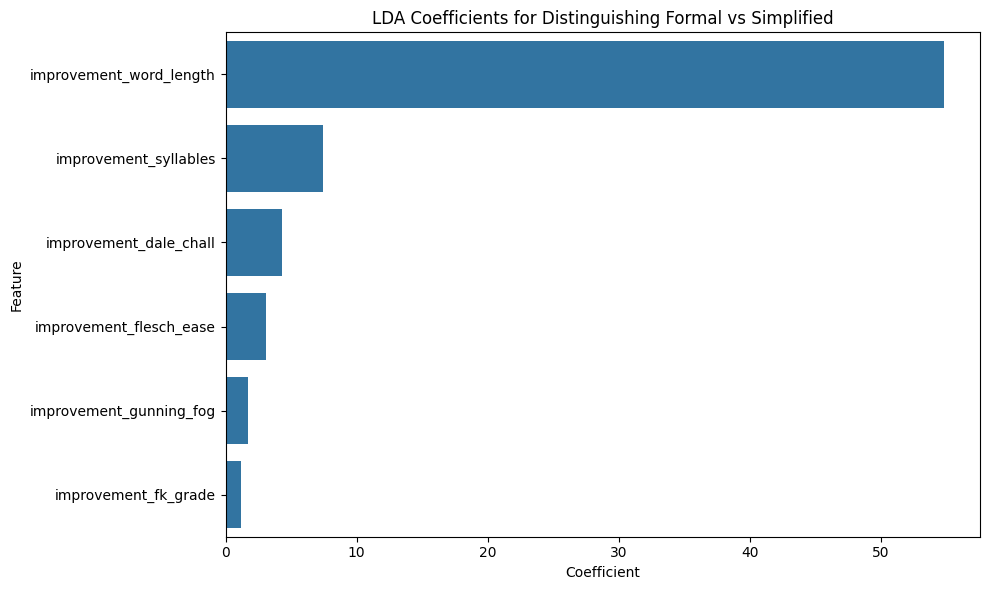

(LinearDiscriminantAnalysis(),
                    Feature  Coefficient
 4  improvement_word_length        54.84
 5    improvement_syllables         7.44
 3   improvement_dale_chall         4.32
 1  improvement_flesch_ease         3.08
 2  improvement_gunning_fog         1.74
 0     improvement_fk_grade         1.19)

In [21]:
def perform_lda(df):
    """
    Use Linear Discriminant Analysis to find the combination of features 
    that best separates formal from simplified text
    """
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Define improvement metrics with correct naming
    improvement_cols = [
        'improvement_fk_grade', 'improvement_flesch_ease', 
        # 'improvement_smog', 
        'improvement_gunning_fog', 
        'improvement_dale_chall', 'improvement_word_length', 
        'improvement_syllables'
    ]
    
    # Map to actual column names in the dataframe
    formal_cols_mapping = {
        'improvement_fk_grade': 'formal_fk_grade',
        'improvement_flesch_ease': 'formal_flesch_ease',
        # 'improvement_smog': 'formal_smog',
        'improvement_gunning_fog': 'formal_gunning_fog',
        'improvement_dale_chall': 'formal_dale_chall',
        'improvement_word_length': 'formal_avg_word_length',  # Fixed this
        'improvement_syllables': 'formal_avg_syllables_per_word'  # Fixed this
    }
    
    # Extract formal metrics with correct column names
    formal_data = df[[formal_cols_mapping[m] for m in improvement_cols]].copy()
    formal_data.columns = improvement_cols
    formal_data['type'] = 'formal'
    
    # Calculate improvements for simplified
    simplified_data = df[improvement_cols].copy()
    simplified_data['type'] = 'simplified'
    
    # Rest of the function remains the same
    # Combine
    combined_data = pd.concat([formal_data, simplified_data], ignore_index=True)
    
    # Extract features and target
    X = combined_data[improvement_cols]
    y = combined_data['type']
    
    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_scaled, y)
    
    # Get coefficients
    coefficients = pd.DataFrame({
        'Feature': improvement_cols,
        'Coefficient': abs(lda.coef_[0])
    }).sort_values('Coefficient', ascending=False)
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('LDA Coefficients for Distinguishing Formal vs Simplified')
    plt.tight_layout()
    plt.savefig("lda_coefficients.png", dpi=300)
    plt.show()
    
    return lda, coefficients
perform_lda(df)